# Modelado Baseline de Clasificación EMG
Este notebook crea y evalúa el primer modelo de clasificación usando los datos procesados en `final_feature_data.parquet`.

In [2]:
# 1. Importar librerías y cargar datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_parquet('../data/processed/final_feature_data.parquet')
df=pd.read_parquet('../data/processed/final_feature_datacombinado_0_2.parquet')
print(f'Shape: {df.shape}')
print(df['Clase'].value_counts())
df.head()

Shape: (223629, 17)
Clase
basal        61439
reposo       39318
adelante     30718
atras        30718
derecha      30718
izquierda    30718
Name: count, dtype: int64


,RMS_EXG Channel 0,WL_EXG Channel 0,RMS_EXG Channel 1,WL_EXG Channel 1,RMS_EXG Channel 2,WL_EXG Channel 2,RMS_EXG Channel 3,WL_EXG Channel 3,RMS_EXG Channel 4,WL_EXG Channel 4,RMS_EXG Channel 5,WL_EXG Channel 5,RMS_EXG Channel 6,WL_EXG Channel 6,RMS_EXG Channel 7,WL_EXG Channel 7,Clase
0,0.872088,0.000024,1.280368,0.005878,2.132244,0.000353,1.998439,0.001438,1.576958,0.039054,2.803140,0.336786,2.207718,0.017805,1.643290,0.003151,basal
1,0.875658,0.010704,1.296320,0.056102,2.129443,0.008945,2.000426,0.008114,1.582736,0.041188,2.780527,0.568515,2.203041,0.022946,1.643290,0.004727,basal
2,0.877819,0.012219,1.308854,0.074208,2.126982,0.013190,2.002133,0.010964,1.576158,0.079162,2.687670,0.915731,2.203554,0.034384,1.644015,0.007624,basal
3,0.876508,0.025244,1.305130,0.129838,2.125780,0.014571,2.001433,0.019581,1.571421,0.083091,2.648316,1.012881,2.204254,0.036342,1.644218,0.008781,basal
4,0.873829,0.036180,1.294588,0.179433,2.124787,0.015717,1.999626,0.027641,1.576304,0.131261,2.706917,1.510910,2.201815,0.053817,1.643536,0.013694,basal


In [5]:
# 2. Preparar X e y
X = df.drop('Clase', axis=1)
y = df['Clase']


Train: (109578, 16), Validación: (46962, 16), Test: (67089, 16)
Accuracy (validación): 0.9998083556918359
Reporte de clasificación (validación):
              precision    recall  f1-score   support

    adelante       1.00      1.00      1.00      6451
       atras       1.00      1.00      1.00      6451
       basal       1.00      1.00      1.00     12902
     derecha       1.00      1.00      1.00      6451
   izquierda       1.00      1.00      1.00      6451
      reposo       1.00      1.00      1.00      8256

    accuracy                           1.00     46962
   macro avg       1.00      1.00      1.00     46962
weighted avg       1.00      1.00      1.00     46962

Accuracy (test): 0.9997764164020927
Reporte de clasificación (test):
              precision    recall  f1-score   support

    adelante       1.00      1.00      1.00      9215
       atras       1.00      1.00      1.00      9215
       basal       1.00      1.00      1.00     18432
     derecha       1.00   

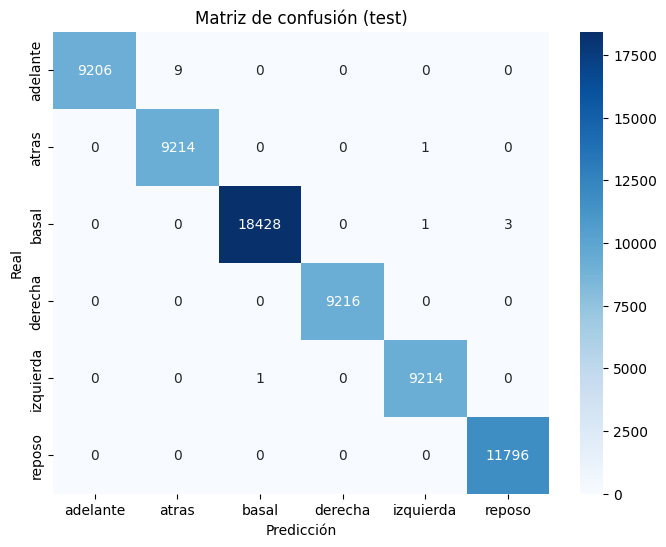

In [17]:
# Nueva partición: entrenamiento, validación y test
from sklearn.model_selection import train_test_split

# 1. Separar conjunto de test (30%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Separar conjunto de validación (30% de lo que queda)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp)

print(f"Train: {X_train.shape}, Validación: {X_val.shape}, Test: {X_test.shape}")

# Entrenamiento usando solo el conjunto de entrenamiento
clf = RandomForestClassifier(n_estimators=1,random_state=42)
clf.fit(X_train, y_train)

# Evaluación en validación
y_val_pred = clf.predict(X_val)
print('Accuracy (validación):', accuracy_score(y_val, y_val_pred))
print('Reporte de clasificación (validación):')
print(classification_report(y_val, y_val_pred))

# Evaluación final en test
y_test_pred = clf.predict(X_test)
print('Accuracy (test):', accuracy_score(y_test, y_test_pred))
print('Reporte de clasificación (test):')
print(classification_report(y_test, y_test_pred))

# Matriz de confusión para test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (test)')
plt.show()

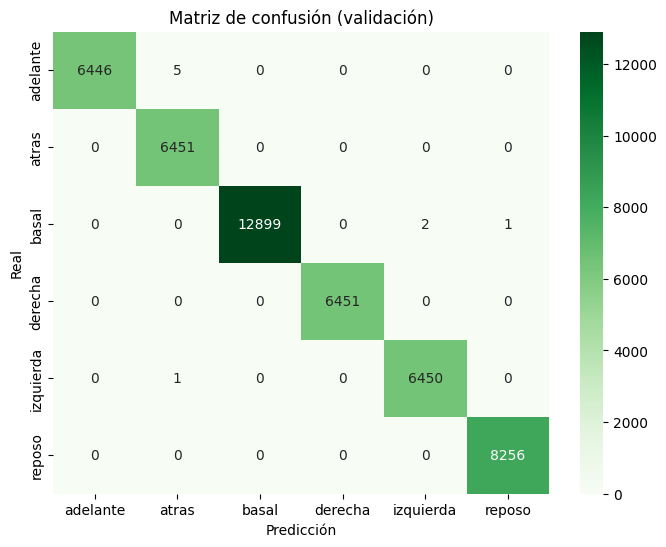

In [18]:
# Matriz de confusión para validación
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (validación)')
plt.show()

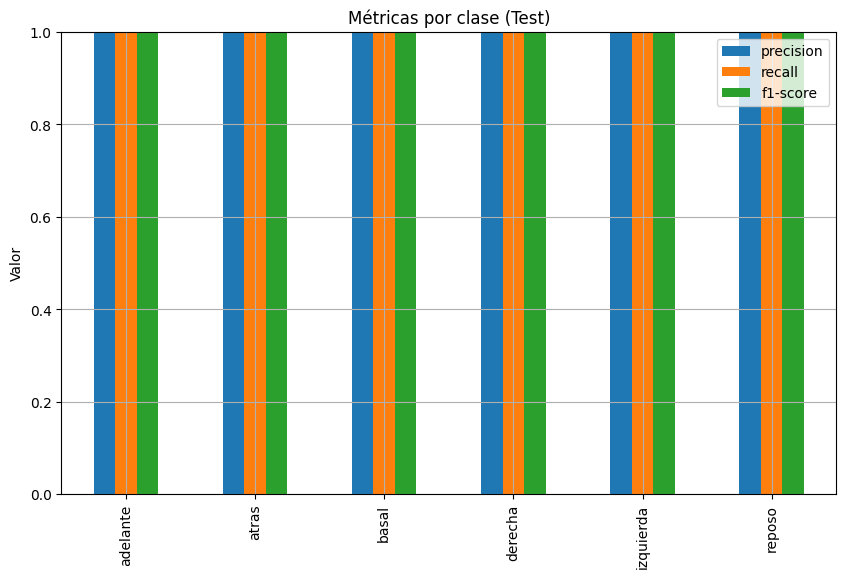

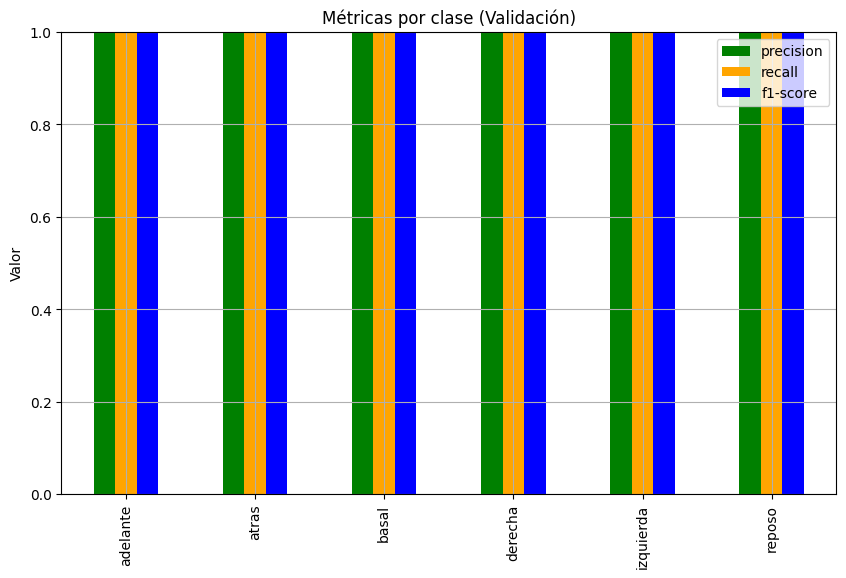

In [8]:
# Visualización de métricas por clase (precision, recall, f1-score)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Para test
report_test = classification_report(y_test, y_test_pred, output_dict=True)
df_report_test = pd.DataFrame(report_test).transpose().iloc[:-3]
df_report_test[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6))
plt.title('Métricas por clase (Test)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(True)
plt.show()

# Para validación
report_val = classification_report(y_val, y_val_pred, output_dict=True)
df_report_val = pd.DataFrame(report_val).transpose().iloc[:-3]
df_report_val[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), color=['green','orange','blue'])
plt.title('Métricas por clase (Validación)')
plt.ylabel('Valor')
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [9]:
# Validación cruzada (cross-validation)
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf_cv = RandomForestClassifier(random_state=42)

scores = cross_val_score(clf_cv, X, y, cv=cv, scoring='accuracy')
print('Accuracy por fold:', scores)
print(f'Accuracy promedio (cross-validation): {scores.mean():.4f} ± {scores.std():.4f}')

Accuracy por fold: [1. 1. 1. 1. 1.]
Accuracy promedio (cross-validation): 1.0000 ± 0.0000


In [10]:
# Guardar el modelo entrenado en la carpeta models/
import joblib

joblib.dump(clf, '../models/random_forest_emg_v2.pkl')
print('Modelo guardado en models/random_forest_emg.pkl')

Modelo guardado en models/random_forest_emg.pkl
